# Least – Squares Problem Project

นายกฤดากร      เชือกไหมทอง   6424650064

นายณัฐธีร์        พิมพ์ภสันต์     6424650304

นางสาวเสาวลักษณ์ ชมชื่น         6424650486

นางสาวเบญฤญา   คำคงศักดิ์      6424650551

นายอิทธิเชรษฐ์    ธิติจรูญโรจน์    6424650650

In [3]:
import numpy as np    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
import statsmodels.formula.api as smf

In [4]:
# ไม่ต้องใส่

import warnings
sns.set_theme()
%matplotlib inline
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.9f' % x)  # change scientific notation 

# ทําการแสดงข้อมูล

In [5]:
#Importing the dataset

df = pd.read_csv('data205.csv') 
display(df.head())
print('\n\033[1mInference:\033[0m The dataset consists of {} features and {} samples.'.format(df.shape[1], df.shape[0]))

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847000,18.181250000,80.583300000,10.749882000,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598000,17.686950000,69.608700000,16.652113000,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924000,9.470250000,43.727300000,16.636703000,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000000,10.606100000,59.043500000,10.739832000,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237000,11.463500000,43.695700000,12.522300000,82,1518,1600



Inference: The dataset consists of 16 features and 730 samples.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# instant is an index column so we can drop it as it will not contribute to the analysis and the dataset already has year and month
# casual + registered = cnt and count is out target column so we can drop casual and registered column

df.drop(['instant','dteday','casual', 'registered'], axis=1, inplace=True)
display(df.head())
print('\n\033[1mInference:\033[0m The dataset consists of {} features and {} samples.'.format(df.shape[1], df.shape[0]))

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847000,18.181250000,80.583300000,10.749882000,985
1,1,0,1,0,0,0,2,14.902598000,17.686950000,69.608700000,16.652113000,801
2,1,0,1,0,1,1,1,8.050924000,9.470250000,43.727300000,16.636703000,1349
3,1,0,1,0,2,1,1,8.200000000,10.606100000,59.043500000,10.739832000,1562
4,1,0,1,0,3,1,1,9.305237000,11.463500000,43.695700000,12.522300000,1600



Inference: The dataset consists of 12 features and 730 samples.


In [8]:
# ไม่ต้องใส่

df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)
df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Snow','Heavy Rain'), inplace=True)
df.holiday.replace((0,1),('No','Yes'),inplace=True)
df.workingday.replace((0,1),('No','Yes'),inplace=True)
df.year.replace((0,1),('2018','2019'),inplace=True)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,2018,Jan,No,Sat,No,Misty,14.110847000,18.181250000,80.583300000,10.749882000,985
1,Spring,2018,Jan,No,Sun,No,Misty,14.902598000,17.686950000,69.608700000,16.652113000,801
2,Spring,2018,Jan,No,Mon,Yes,Clear,8.050924000,9.470250000,43.727300000,16.636703000,1349
3,Spring,2018,Jan,No,Tue,Yes,Clear,8.200000000,10.606100000,59.043500000,10.739832000,1562
4,Spring,2018,Jan,No,Wed,Yes,Clear,9.305237000,11.463500000,43.695700000,12.522300000,1600


In [9]:
# ไม่ต้องใส่

df1 = df[['temp', 'humidity', 'windspeed','count']]

In [10]:
# ไม่ต้องใส่

cont_var = [i for i in df1.select_dtypes(exclude='object').columns if df[i].nunique() > 2 and i !='cnt']

# ในส่วนนี้เป็นเพียงการลอง plot กราฟ เป็น Box plot เพื่อให้มีความเข้าใจข้อมูลมากขึ้น

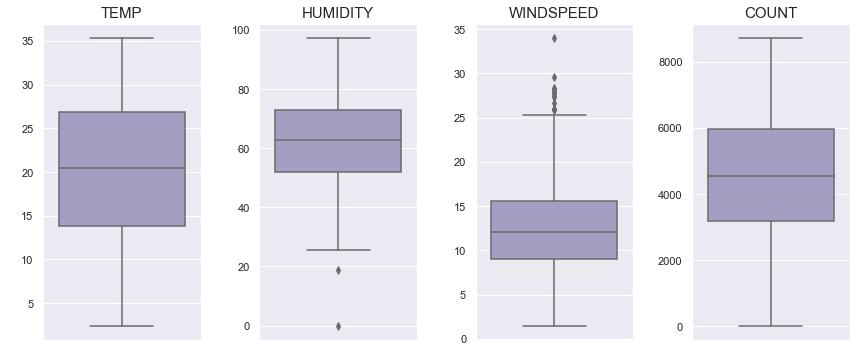

In [11]:
# ไม่ต้องใส่

fig, ax = plt.subplots(nrows=1, ncols= len(cont_var), figsize=(12, 5))

for i in range(len(cont_var)):
    
    sns.boxplot(y=df1[cont_var[i]], ax=ax[i], palette = 'Purples')
    
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize =15)
    ax[i].set_ylabel(' ')

plt.tight_layout()
plt.show()    

In [12]:
#Checking the stats of all the columns

df.describe()

,temp,atemp,humidity,windspeed,count
count,730.000000000,730.000000000,730.000000000,730.000000000,730.000000000
mean,20.319259217,23.726321623,62.765174932,12.763619655,4508.006849315
std,7.506728937,8.150307762,14.237589043,5.195840704,1936.011647361
min,2.424346400,3.953480000,0.000000000,1.500243900,22.000000000
25%,13.811885250,16.889712500,52.000000000,9.041650000,3169.750000000
50%,20.465826500,24.368225000,62.625000000,12.125325000,4548.500000000
75%,26.880614750,30.445775000,72.989575000,15.625589250,5966.000000000
max,35.328347000,42.044800000,97.250000000,34.000021000,8714.000000000


# ทําการ plot กราฟ ที่เป็นข้อมูลเชิงปริมาณ โดยใช้ scatter plot

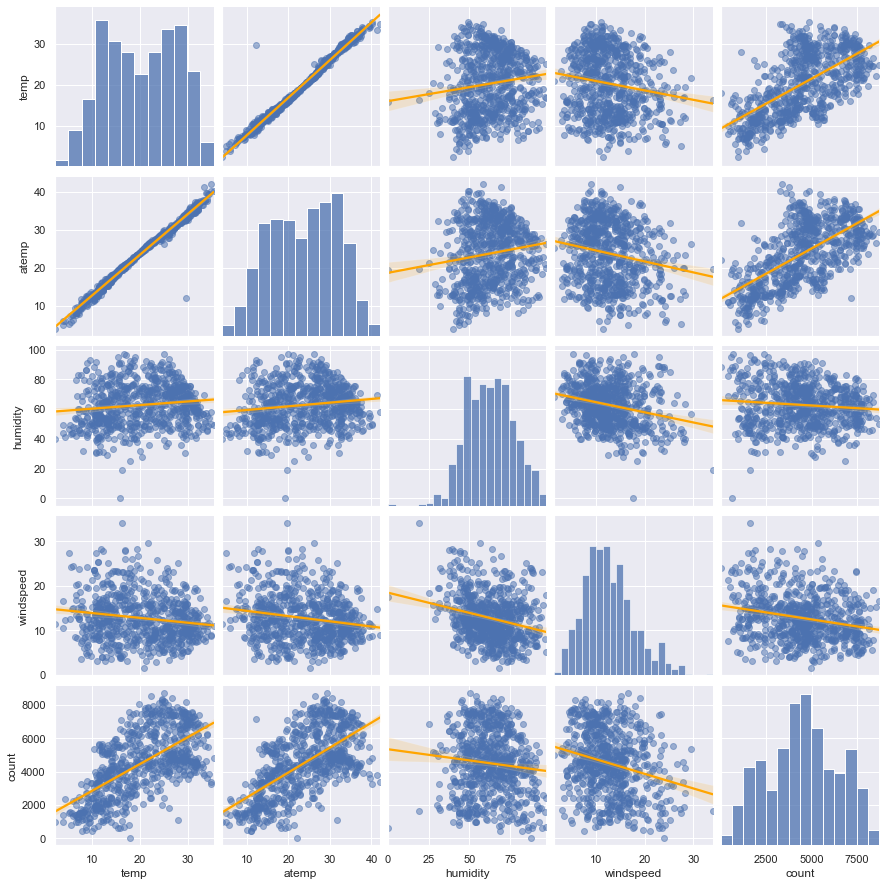

In [13]:
sns.pairplot(df, kind='reg', plot_kws={'scatter_kws':{'alpha':0.5},'line_kws':{'color':'orange'}})

# หาค่าสหสัมพันธ์ เพื่อดูความสัมพันธ์ของข้อมูล โดยใช้ Heat map

<AxesSubplot:>

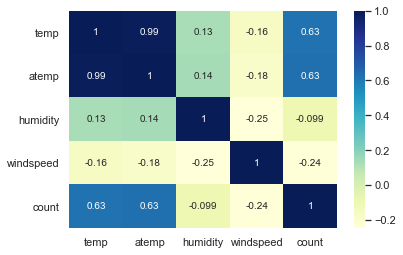

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

# ทําการ Drop ข้อมูล

In [15]:
df.drop(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp'], axis=1, inplace=True)
display(df.head())
print('\n\033[1mInference:\033[0m The dataset consists of {} features and {} samples.'.format(df.shape[1], df.shape[0]))

,temp,humidity,windspeed,count
0,14.110847000,80.583300000,10.749882000,985
1,14.902598000,69.608700000,16.652113000,801
2,8.050924000,43.727300000,16.636703000,1349
3,8.200000000,59.043500000,10.739832000,1562
4,9.305237000,43.695700000,12.522300000,1600



Inference: The dataset consists of 4 features and 730 samples.


# ทําการ plot กราฟ ที่ได้ทําการตัด Atemp ออก โดยใช้ scatter plot

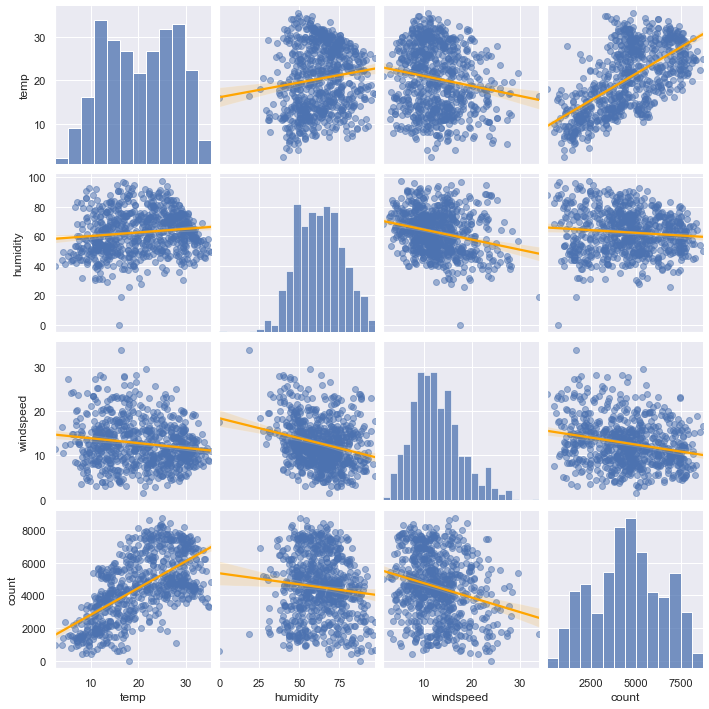

In [16]:
sns.pairplot(df, kind='reg', plot_kws={'scatter_kws':{'alpha':0.5},'line_kws':{'color':'orange'}})

In [17]:
#Checking the stats of all the columns (without atemp)

df.describe()

,temp,humidity,windspeed,count
count,730.000000000,730.000000000,730.000000000,730.000000000
mean,20.319259217,62.765174932,12.763619655,4508.006849315
std,7.506728937,14.237589043,5.195840704,1936.011647361
min,2.424346400,0.000000000,1.500243900,22.000000000
25%,13.811885250,52.000000000,9.041650000,3169.750000000
50%,20.465826500,62.625000000,12.125325000,4548.500000000
75%,26.880614750,72.989575000,15.625589250,5966.000000000
max,35.328347000,97.250000000,34.000021000,8714.000000000


In [18]:
dcorr = df[['temp', 'humidity', 'windspeed','count']].corr()
dcorr.style.background_gradient()

,temp,humidity,windspeed,count
temp,1.000000,0.128565,-0.158186,0.627044
humidity,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.248506,1.000000,-0.235132
count,0.627044,-0.098543,-0.235132,1.000000


# หาค่าสหสัมพันธ์ เพื่อดูความสัมพันธ์ของข้อมูล โดยใช้ Heat map

<AxesSubplot:>

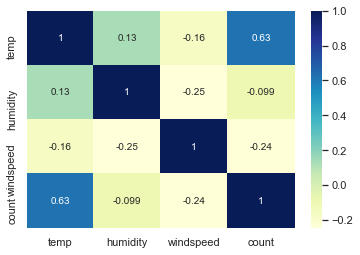

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [20]:
#Splitting the Data into x_train, x_test, y_train, y_test

x = df[['temp', 'humidity', 'windspeed']]
y = df['count']

# ทําการแบ่งข้อมูลเป็น 2 กลุ่ม คือ train กับ test โดยแบ่ง train 80เปอร์เซ็นต์ และ test 20เปอร์เซ็นต์

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [22]:
print('x_train:', x_train.shape, '\ny_train:', y_train.shape, '\nx_test:', x_test.shape, '\ny_test:', y_test.shape)

x_train: (584, 3) 
y_train: (584,) 
x_test: (146, 3) 
y_test: (146,)


# Linear Regression

In [23]:
reg = LinearRegression() 
reg

LinearRegression()

In [24]:
reg.fit(x_train, y_train) 

LinearRegression()

In [25]:
# ไม่ต้องใส่

print('r_square :{:.4f}'.format(reg.score(x_test,y_test)))  # R-squared

r_square :0.3554


In [26]:
# ไม่ต้องใส่

print('r_square :{:.4f}'.format(reg.score(x_train,y_train))) # R-squared

r_square :0.4819


In [27]:
reg.intercept_    # b from y = ax + b

4079.90124562281

In [28]:
reg.coef_         # a from y = ax + b

array([165.7162467 , -30.87105801, -78.78793983])

In [29]:
y_pred_test = reg.predict(x_test)

In [30]:
# dataframe สำหรับ mod_a              (ไม่ต้องใส่)

train = pd.concat([x_train, y_train], axis='columns')

In [31]:
# mod_a สำหรับไปสร้าง statsmodels      (ไม่ต้องใส่)

mod_a = smf.ols(formula='count ~ temp + humidity + windspeed', data=train).fit()

# ในส่วนนี้เป็นเพียงแค่การลองทํา stats models

In [32]:
# ไม่ต้องใส่

print(mod_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     179.8
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           2.05e-82
Time:                        11:38:03   Log-Likelihood:                -5061.8
No. Observations:                 584   AIC:                         1.013e+04
Df Residuals:                     580   BIC:                         1.015e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4079.9012    374.305     10.900      0.0

# ทําการแสดงค่า Accuracy และ Root Mean Square Error

In [33]:
print('\033[1mAccuracy\033[0m: {:.4f}'.format(reg.score(x_test, y_test)))
print('\033[1mRoot mean squared error\033[0m: {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))

Accuracy: 0.3554
Root mean squared error: 1487.2402


In [34]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# ทําการ plot กราฟออกมา ดังนี

Text(0, 0.5, 'y_test')

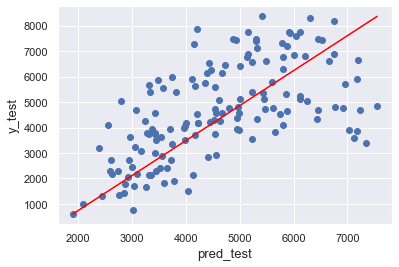

In [35]:
pred_test = reg.predict(x_test)
plt.scatter(pred_test, y_test)
plt.plot([y_pred_test.min(),y_pred_test.max()],[y_test.min(),y_test.max()],color = 'red')
plt.xlabel('pred_test', fontsize=13)
plt.ylabel('y_test', fontsize=13)

In [36]:
pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_pred_test)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,1207.735451077,2211883.448741917,1487.240212186,0.355362330


In [37]:
print_evaluate(y_test, y_pred_test)

MAE: 1207.7354510769535
MSE: 2211883.4487419166
RMSE: 1487.2402121856162
R2 Square 0.3553623298701276


# Ridge Regression

In [38]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001,random_state=7)
model.fit(x_train, y_train)
pred_test = model.predict(x_test)

In [39]:
pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, pred_test)]], 
                            columns=['Model', 'MAE', 'MSE', 'rmse', 'r2_square'])

,Model,MAE,MSE,rmse,r2_square
0,Ridge Regression,1207.443237032,2209761.304462605,1486.526590567,0.355980814


In [40]:
print_evaluate(y_test, pred_test)

MAE: 1207.4432370322738
MSE: 2209761.304462605
RMSE: 1486.5265905669514
R2 Square 0.35598081369877277


# หาค่า coefficient

In [41]:
co=np.round(reg.coef_.ravel(),2)
column=['temp','humidity','windspeed']
coef=pd.DataFrame(co,column)
coef.columns=["coefficient"]
coef

,coefficient
temp,165.720000000
humidity,-30.870000000
windspeed,-78.790000000


# ทําการ plot กราฟออกมา ซึ่ง x เป็น sample และ y เป็น count เพื่อนํามาเปรียบเทียบข้อมูลจริง กับข้อมูลที่เราได้ทําการ predicted

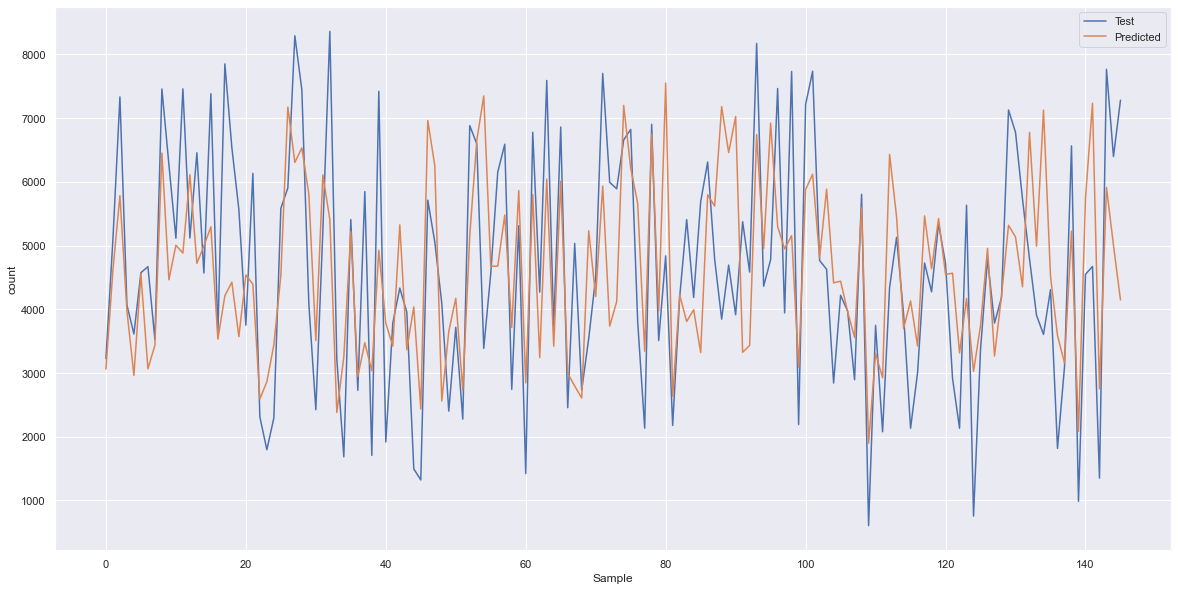

In [42]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(y_test.tolist()[0:500])
plt.plot(y_pred_test.tolist()[0:500])
plt.xlabel('Sample')
plt.ylabel('count')
plt.legend(['Test','Predicted'])